In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def show_image(img1, img2, descr1, descr2):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(img1)                                # subplot 1
    axes[0].set_title(descr1)
    axes[0].axis("off")

    axes[1].imshow(img2)                                # subplot 2
    axes[1].set_title(descr2)
    axes[1].axis("off")

    plt.show()

<h3>Task 1: Intensity Inversion and Gamma Correction

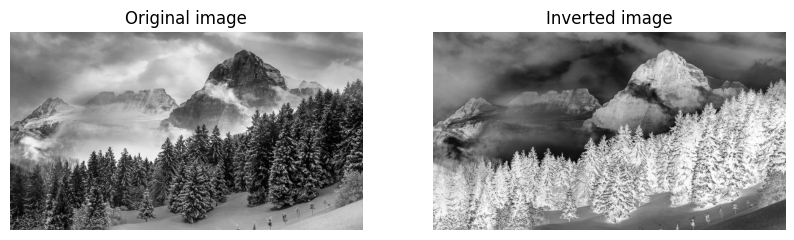

In [3]:
image = cv2.imread("images/Task1.jpg")

# invert the colors
# bitwise_not(img):      switching each bit of img i <=> subtracting i from full 1s <=> inverting i
inverted_image = cv2.bitwise_not(image)

show_image(image, inverted_image, "Original image", "Inverted image")

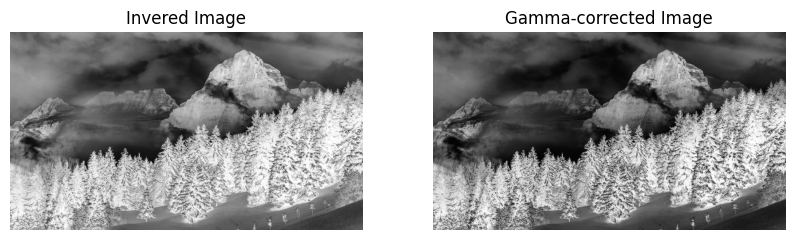

In [4]:
# gamma correction: power transform with convention
# - gamma > 1 => brighter
#   - 1/gamma < 1 => log transform, dark fleshed white compressed
# - gamma < 1 => darker
#   - 1/gamma > 1 => power transform, dark compressed white fleshed
gamma = 0.7
inv_gamma = 1.0 / gamma

# LUT(img, tble):   for every possible intensity i of the image, set
#                   tble[i] = gamma(i) = A*V^gamma, V convention in [0,1]
#                   LUT(img, tble) sets img[i,j] = tble[img[i,j]]
table = np.array([(i / 255.0) ** inv_gamma * 255 for i in range(256)]).astype("uint8")
adjusted_image = cv2.LUT(inverted_image, table)

show_image(inverted_image, adjusted_image, "Invered Image", "Gamma-corrected Image")

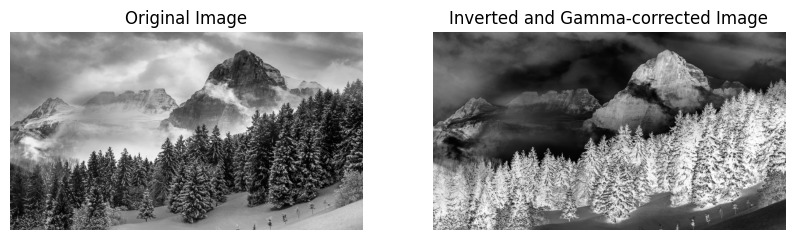

In [5]:
show_image(image, adjusted_image, "Original Image", "Inverted and Gamma-corrected Image")

<h3>Task 2: Noise Reduction

The image has a lot of salt and pepper noise, i.e. sparsely occurring black and white pixels. Then the best choice is median filtering since 

  - Median filter works by taking the median value in every neighborhood of pixels, so;  
  - The *sparse* noise pixels will thus be removed (they will almost never be the median but rather an extreme).  

This choice is more appropriate than some other candidates:  

- Gaussian filtering works by giving decreasing weight to neighbouring pixels, but
  - this would still take into account these tiny noise details in its blurring effect, which is less ideal
- Similarly, uniform filtering works by giving equal weight to all pixels, thus
  - leading to an even greater consideration in the noise pixels when computing the mean,
  - leading to a overall greater loss of detail.  

Additionally, there are also no small details which we must preserve with Gaussian or uniform filtering.

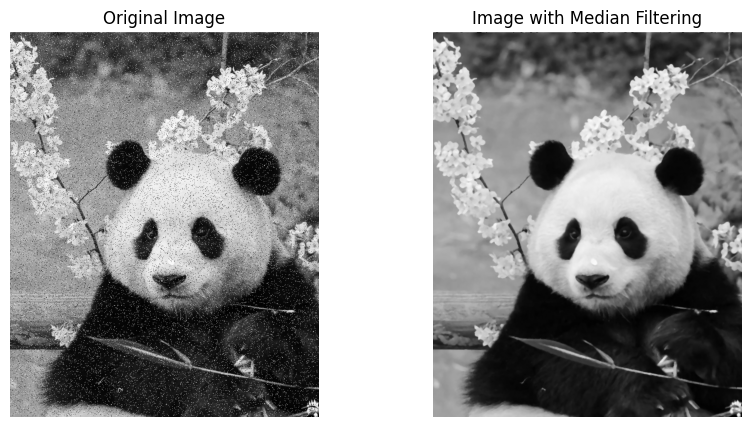

In [6]:
image = cv2.imread("images/Task2.jpg")

# apply median filter
# medianBlur(img, k):       takes median of neighbourhood/kernel size k
#                           larger = more blurred; we only need big enough to get rid of salt-and-pepper
denoised_image = cv2.medianBlur(image, 5)

show_image(image, denoised_image, "Original Image", "Image with Median Filtering")

<h3>Task 3: Sharpening

In general, sharpening works by performing a linear combination of the input image and a high-pass filter of it.

The image has a lot of irregularly sized blurry edges, in the wave and along the cliff faces. The best choice for sharpening is Laplacian since 

  - Laplacian works by using the Laplacian as a high-pass filter, i.e.
  -   it performs a second-derivative calculation to find regions of rapidly changing intensity; and  
  - adding this high-pass image of rapidly changing intensities to the original image to leave a sharpened result.  

This choice is more appropriate than some other candidates:  

- Unsharp masking works by subtracting a Gaussian-filter from the initial image to act as a high-pass filter. This means:
  - it has a fixed kernel size and mask intensity for the entire image;
  - larger edges and smaller edges are not proportionally sharpened and smaller edges may be missed whilst larger edges blurred;
  - Laplacian sharpening does not miss this because it catches where intensities change rapidly across the entire image.
- Overall this is unhelpful because there are edges of many different sizes, e.g. in the waves and in the cliff-face.

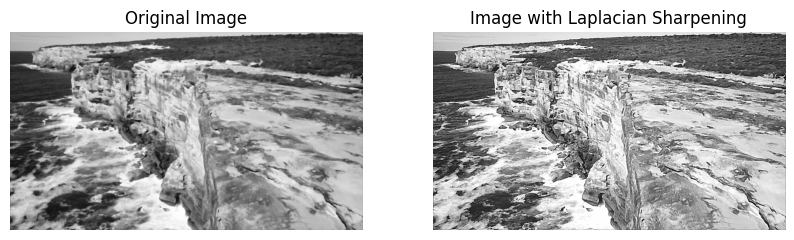

In [7]:
image = cv2.imread("images/Task3.jpg")

# apply laplacian:      g = af + b(h * f) + k, for h a high-pass filter i.e. LoG
# Laplacian:            computes second-order derivatives of the image; regions of rapid intensity change
#                       CV_64F => store in negative-compatible format, k=3 => convolution kernel from lectures
# clip                  - sends some to negative so we need to clip and return to [0,255]
#                       - note in practice we do - instead of + because - -4f(x,y) = +4f(x,y)
laplacian = cv2.Laplacian(image, cv2.CV_64F, ksize=3)
sharpened_image = image - laplacian

# subtracting laplacian makes darker and sends some to negative
sharpened_image = np.clip(sharpened_image + 20, 0, 255).astype(np.uint8)
show_image(image, sharpened_image, "Original Image", "Image with Laplacian Sharpening")